

Face Recognition using Principal Component Analysis


### <b>Objective:</b>
This question requires you to create a basic facial recognition system using a technique called principal component analysis (PCA) 
by projecting the face images on the feature space (face space) which best
represents the variations among distinct faces. The face space is defined as the
“Eigenfaces", which are the eigenvectors of the set of faces.

The goal of implementing this system is to recognize a person's face by comparing it to a pre-existing database of faces, and identifying the closest match.

Link to paper on Eigenfaces: [https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf](https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf)

### <b>About the dataset:</b>  
The AT&T face dataset contains a set of grayscale face images with dimensions 92x112. The images are organised in 40 directories (one for each subject), which have names of the form sX, where X indicates the subject number (between 1 and 40). In each of these directories, there are ten different images of that subject, which have names of the form Y.pgm, where Y is the image number for that subject (between 1 and 10). These 10 images per person are taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement). <b>Link:</b> [https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/](https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/)



### Tasks
1. Load dataset and divide the date into training and test sets. 
2. Implement the PCA algorithm from scratch.
3. Implement image reconstruction using the eigen projections and visualise differences for different number of components.
4. Visualise the mean(Eigen face) generated.
5. Given training set, obtain accuracy by attempting a face regonition module and obtaining the accuracy for different number of principal components.


#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### Import Dataset
Assign labels for the images based on the subdirectories to obtain X(images array) and y (labels).

Ensure that the test data contains atleast one image from each category.

In [2]:
IMG_WIDTH = 64
IMG_HEIGHT = 64

# Load training dataset
X_train = []
y_train = []
for i in range(1, 41):
    for j in range(1, 9):
        # Load image
        img_path = f'/kaggle/input/pca-asm/att_faces/Training/s{i}/{j}.pgm'
        #print(f'Loading {img_path}')
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        # Check image size
        #print(f'Image size: {img.shape}')
        # Resize image
        img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
        # Flatten image
        img = img.flatten()
        #print(img)
        # Add image to X_train
        X_train.append(img)
        # Add label to y_train
        y_train.append(i)
        
# len(X_train[0])
       
        




In [21]:
# Load testing dataset
X_test = []
y_test = []
for i in range(1, 41):
    for j in range(9, 11):
        # Load image
        img_path = f'/kaggle/input/pca-asm/att_faces/Testing/s{i}/{j}.pgm'
        #print(f'Loading {img_path}')
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        # Check if image is empty
        if img is not None:
            # Resize image
            img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
            # Flatten image
            img = img.flatten()
            # Add image to X_test
            X_test.append(img)
            # Add label to y_test
            y_test.append(i)
        #else:
            #print(f'Could not load {img_path}')

# Convert X_train, X_test, y_train, and y_test to NumPy arrays
X_train = np.array(X_train)
#print(X_train)
#print(X_train.shape[0])
y_train = np.array(y_train)
X_test = np.array(X_test)
#print(X_test)
y_test = np.array(y_test)
X_train.shape

[[ 47  45  47 ...  44  46  46]
 [ 60  61  56 ...  36  34  33]
 [ 42  52  44 ...  30  28  28]
 ...
 [124 124 124 ...  38  38  40]
 [129 129 126 ...  91  93  93]
 [123 121 125 ...  40  38  38]]


(320, 4096)

#### Implement PCA Algorithm.

In [10]:
# # Plot the mean square errors against the number of components used in PCA
# plt.plot(n_components_range, mse)
# plt.xlabel('Number of Principal Components')
# plt.ylabel('Mean Square Error')
# plt.title('Mean Square Error vs Number of Principal Components')
# plt.show()

In [11]:
# # Plot the accuracies against the number of components used in PCA
# plt.plot(n_components_range, accuracies)
# plt.xlabel('Number of Principal Components')
# plt.ylabel('Accuracy')
# plt.title('Accuracy vs Number of Principal Components')
# plt.show()

In [12]:
# # Plot the semi-log variant of the mean square error plot
# plt.semilogy(n_components_range, mse)
# plt.xlabel('Number of Principal Components')
# plt.ylabel('Mean Square Error (log scale)')
# plt.title('Mean Square Error vs Number of Principal Components (log scale)')
# plt.show()

Explain your steps with comments and write a brief explanation of the method.

In [13]:
"""
Implement pca in the following function by taking the following arguements:
1. X(images array)
2. number of components
The function must return the eigen vectors (principal components) also termed "Eigen faces"
"""
def principalComponentAnalysis(X, number_of_compoonents):

    Img_Mean=np.mean(X,axis=0)
    
    print(X.shape)
    X=X-Img_Mean
    Cov=np.cov(X.T)
    #print(Cov.shape)
    Eigen_Val,Eigen_Vec=np.linalg.eigh(Cov)
    #print(Eigen_Val)
    idxs=np.argsort(Eigen_Val)[::-1]
    Eigen_Val=Eigen_Val[idxs]
    Eigen_Vec=Eigen_Vec[idxs]
    New_Comp=Eigen_Vec[:number_of_compoonents]
    #print(New_Comp.shape)
    # Calculating Projection
    return New_Comp.T@New_Comp,Img_Mean

#Proj,MeanTrain=principalComponentAnalysis(X_train,10)

In [14]:
# Proj.shape
#Proj

(320, 4096)


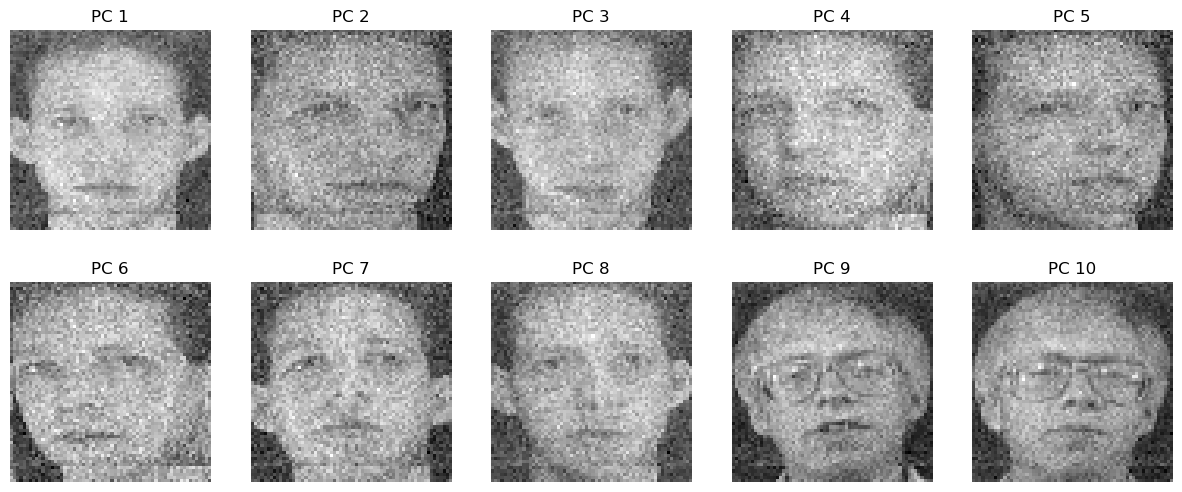

(320, 4096)


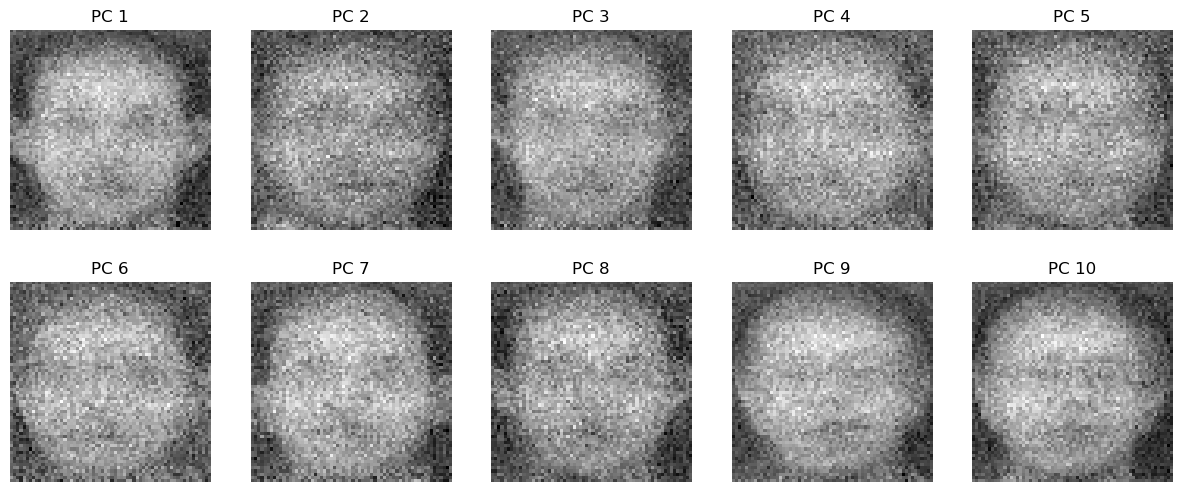

In [15]:
import cv2
# X_train[0]

#NewX


for i in [3000,1000]:
    Proj,MeanTrain=principalComponentAnalysis(X_train,i)
    #print(X_train.shape,MeanTrain.shape,Proj.shape)
   
    NewX=(X_train-MeanTrain)@Proj+MeanTrain
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    for j, ax in enumerate(axes.flatten()):
        ax.imshow(NewX[j].reshape(IMG_HEIGHT, IMG_WIDTH), cmap='gray')
        ax.set_title(f'PC {j+1}')
        ax.axis('off')
    plt.show()



    #MeanTest=np.mean(X_Test,axis=0)
    #Test_Centr=X_test-MeanTest
    #NewTest=MeanTest+Test_Centr@Proj
   
    
    #return np.dot(X,New_Comp.T)
#principalComponentAnalysis(X_train,10)

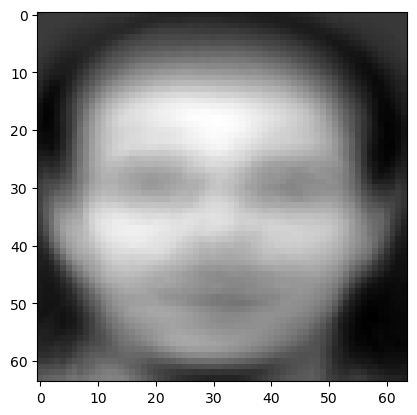

In [22]:
Mean_Img=np.mean(X_train,axis=0)
plt.imshow(Mean_Img.reshape(IMG_HEIGHT, IMG_WIDTH), cmap='gray')
plt.show()

#### Implement Image Reconstruction from Eigenfaces


Explain your steps with comments and write a brief explanation of the method.

In [16]:
# Function to implement image reconstruction by taking arguements as necessary.
def imageReconstruction():
  

  return

#### Visualisation
Visualise the results for different number of principal components(pc = 5,10,100, 1000, all).

**Note:** Ensure that the images are labelled appropriately.

#### Implement face recognition module based on the norm
Explain your steps with comments and write a brief explanation of the method.

*   Test the module and report accuracies based on the number of components taken for a range of value and plot them. 
*   Also plot the mean square error vs the number of eigenvectors taken and report your observations. 
*   For further empirical analysis, plot the semi-log variant of the error plot obtained above.

In [17]:
"""
Implement pca in the following function by taking the following arguements:
1. Test image
2. Eigenvectors
3. Mean Eigen Face
4. Training Set(X_train,y_train)
The function must return the following:
1. image with smallest error
2. error value
3. prediction class
"""
def model():

  return

In [18]:
"""
Iterate through all the images in the test data and 
test the accurate by taking different number of components
"""

'\nIterate through all the images in the test data and \ntest the accurate by taking different number of components\n'

In [19]:
# Plot Number of eigenvectors vs Mean Square Error

In [20]:
# Plot Number of eigenvectors vs Logarithmic Mean Square Error

Summarise your observations on the plots and accuracies

**Answer:**

State the advantages and limitations of using PCA in general. Also state its limitations in context of face recognition

**Answer:**